In [27]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
import matplotlib.pyplot as plt

In [28]:
Img_size=256
batch_size=32

In [29]:
import zipfile
zip_ref = zipfile.ZipFile("/content/potato_disease_data.zip", 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [30]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "potato_disease_data",
    shuffle=True,
    image_size=(Img_size,Img_size),
    batch_size=batch_size

)

Found 2152 files belonging to 3 classes.


In [31]:
class_name = dataset.class_names
class_name

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [32]:
len(dataset)
#each batch 32 different images

68

In [33]:
#This is first batch
for image_batch, label_batch in dataset.take(1):
  print(image_batch.shape)
  print(label_batch.numpy())

(32, 256, 256, 3)
[0 0 2 0 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 0 1 1 1 1 0 0 1 1 1 2]


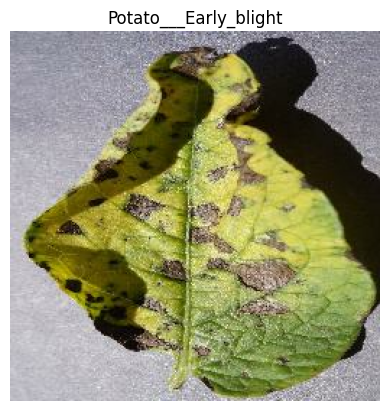

In [34]:
for image_batch, label_batch in dataset.take(1):
  plt.imshow(image_batch[0].numpy().astype("uint8"))
  plt.title(class_name[label_batch[0]])
  plt.axis("off")

In [35]:
#80$ training
#10% test
#10% validation

In [36]:
train_ds = dataset.take(54)
val_ds = dataset.skip(54).take(6)
test_ds = dataset.skip(60).take(8)

In [37]:
len(val_ds)

6

In [38]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [39]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(Img_size,Img_size),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [40]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

Model building CNN

In [41]:

input_shape = (32,Img_size,Img_size,3)
model = Sequential([resize_and_rescale, data_augmentation])
model.add(Conv2D(32, kernel_size = (3,3), activation ='relu', input_shape = input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size = (3,3), activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size = (3,3), activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size = (3,3), activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size = (3,3), activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size = (3,3), activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

model.build(input_shape = input_shape)


In [42]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential_4 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (32, 127, 127, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [43]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [44]:
history = model.fit(train_ds, epochs=50,batch_size=batch_size, verbose=1, validation_data=val_ds)

Epoch 1/50
54/54 [==============================] - 10s 91ms/step - loss: 0.9014 - accuracy: 0.5208 - val_loss: 0.8412 - val_accuracy: 0.5573
Epoch 2/50
54/54 [==============================] - 3s 61ms/step - loss: 0.7317 - accuracy: 0.6476 - val_loss: 0.5351 - val_accuracy: 0.7604
Epoch 3/50
54/54 [==============================] - 3s 63ms/step - loss: 0.4883 - accuracy: 0.7905 - val_loss: 0.5015 - val_accuracy: 0.7656
Epoch 4/50
54/54 [==============================] - 3s 63ms/step - loss: 0.3947 - accuracy: 0.8339 - val_loss: 0.3217 - val_accuracy: 0.8906
Epoch 5/50
54/54 [==============================] - 3s 61ms/step - loss: 0.2966 - accuracy: 0.8825 - val_loss: 0.3167 - val_accuracy: 0.8385
Epoch 6/50
54/54 [==============================] - 3s 62ms/step - loss: 0.2599 - accuracy: 0.8970 - val_loss: 0.2163 - val_accuracy: 0.9167
Epoch 7/50
54/54 [==============================] - 3s 60ms/step - loss: 0.1888 - accuracy: 0.9248 - val_loss: 0.1191 - val_accuracy: 0.9375
Epoch 8/50
5

In [45]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 2s 21ms/step - loss: 0.2257 - accuracy: 0.9310


In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

<function matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)>

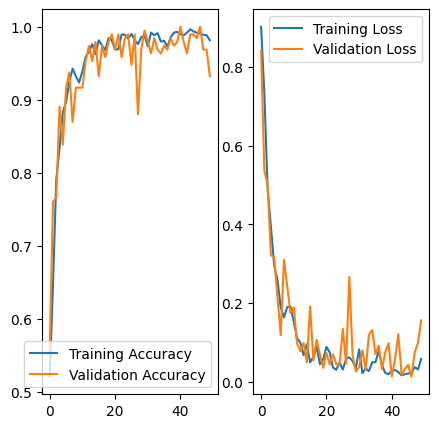

In [47]:
plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
plt.plot(range(50), acc, label='Training Accuracy')
plt.plot(range(50), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title

plt.subplot(1,2,2)
plt.plot(range(50), loss, label='Training Loss')
plt.plot(range(50), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title

actual label: Potato___Late_blight
1/1 [==============================] - 0s 56ms/step
predicted label: Potato___Late_blight


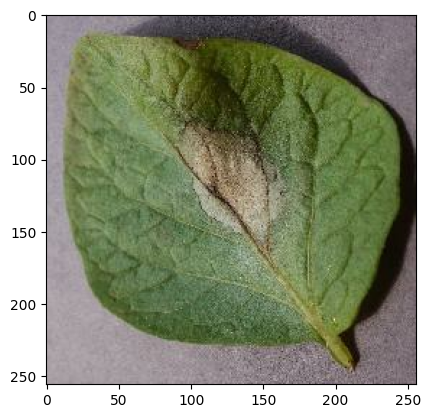

In [53]:
import numpy as np

for images_batch, labels_batch in test_ds.take(1):
  first_image = images_batch[0].numpy().astype('uint8')
  first_label = labels_batch[0].numpy()

  plt.imshow(first_image)
  print("actual label:", class_name[first_label])

  batch_prediction = model.predict(images_batch)
  print("predicted label:", class_name[np.argmax(batch_prediction[0])])



In [56]:
model_version=1
model.save(f"/content/(model_version)")